<a href="https://colab.research.google.com/github/KeerthanaRajaR/Linear_Algebra_The_Coding_Way/blob/main/Eigenvalues%20and%20Eigenvectors/EigenValuesVectors_Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
from IPython.display import Image

uploaded=files.upload()


Saving ass6.1.jpg to ass6.1.jpg


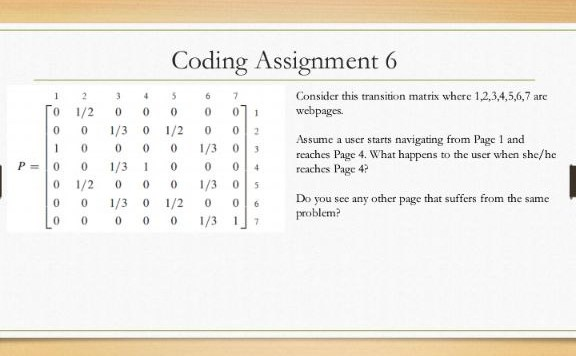

In [13]:
Image('ass6.1.jpg',
      width=650)

In [14]:
uploaded=files.upload()

Saving ass6.2.jpg to ass6.2.jpg


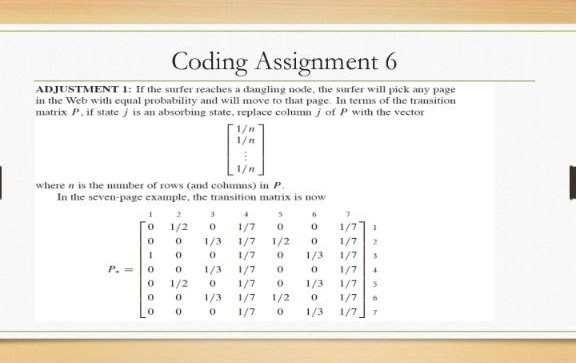

In [15]:
Image('ass6.2.jpg',
      width=650)

In [16]:
uploaded=files.upload()

Saving ass6.3.jpg to ass6.3.jpg


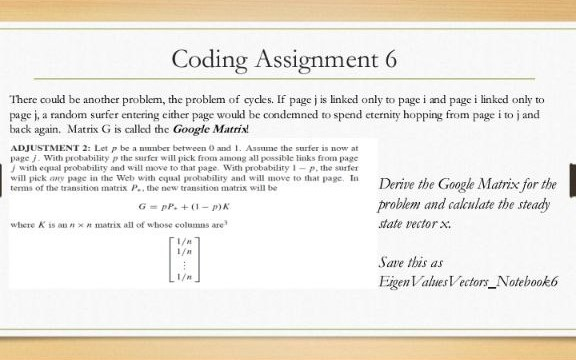

In [17]:
Image('ass6.3.jpg',
      width=650)

In [ ]:
UNDERSTAND THE PROBLEM:
1. Transition Matrix :
    - The transition matrix  describes the probabilities of transitioning from one page to another. Each row represents the current page, and each column represents the next page. For example,  Pij represents the probability of moving from page i to page  j .

2. Adjustment 1:
    - If the user reaches a dangling node (a page with no outgoing links), the user will randomly pick any page in the web with equal probability and move to that page.
    - This adjustment involves replacing the column of the absorbing state (dangling node) with a vector containing equal probabilities for all pages.

3. Adjustment 2:
    - Introduces a parameter  between 0 and 1.
    - If the user is at a page, with probability , they will pick from among all possible links on that page with equal probability and move to the chosen page. With probability , they will pick any page on the web with equal probability and move to that page.
    - The transition matrix  is adjusted according to this probability parameter

4. Google Matrix :
    - The Google Matrix  is derived from the original transition matrix with the specified adjustments.

5. Steady State Vector:
    - The steady state vector  represents the long-term probabilities of the user being on each page after many transitions.
    - It is calculated using an iterative method.

In [ ]:
import numpy as np

# Original transition matrix P
P = np.array([
    [0, 1/2, 0, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [1, 0, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 1, 0, 0, 0],
    [0, 1/2, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [0, 0, 0, 0, 0, 1/3, 1]
])

# Constants
p = 0.85  # Probability parameter for Adjustment 2
n = P.shape[0]  # Number of pages

# Adjustment 1: Replace column of absorbing state with equal probability vector
P[:, 3] = np.ones(n) / n

# Adjustment 2: Compute Google Matrix G
G = p * P + (1 - p) * (np.ones_like(P) / n)

# Iterative method to calculate the steady state vector
def power_iteration(A, num_iterations=1000, tol=1e-6):
    n = A.shape[0]
    x = np.ones(n) / n  # Initial guess
    for _ in range(num_iterations):
        x_new = np.dot(A, x)
        if np.linalg.norm(x_new - x, ord=1) < tol:
            return x_new
        x = x_new
    return x

# Calculate the steady state vector using iterative method
x = power_iteration(G.T)  # Transpose G for power iteration

# Print Google Matrix G
print("Google Matrix G:")
print(G)

Google Matrix G:
[[0.02142857 0.44642857 0.02142857 0.14285714 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.44642857 0.02142857
  0.02142857]
 [0.87142857 0.02142857 0.02142857 0.14285714 0.02142857 0.3047619
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.44642857 0.02142857 0.14285714 0.02142857 0.3047619
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.44642857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.14285714 0.02142857 0.3047619
  0.87142857]]


# Print steady state probabilities for each page
print("\nSteady state vector x:")
print(x)

Steady state vector x:
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
